# Подготовка данных

Загрузка данных

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [127]:
df.shape

(11017, 36)

Предобработка: удаление дубликатов и строк с пропущенными значениями

In [128]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(9529, 36)

Корреляция между целевой переменной `RiskScore` на данный момент среди числовых признаков


In [129]:
df.select_dtypes(include=[float, int]).corr()['RiskScore']

,RiskScore
Age,-0.001519
AnnualIncome,-0.007370
CreditScore,0.001598
LoanAmount,0.012652
LoanDuration,0.004275
NumberOfDependents,-0.020708
MonthlyDebtPayments,-0.001057
CreditCardUtilizationRate,0.004804
NumberOfOpenCreditLines,-0.000776
NumberOfCreditInquiries,0.013553


<Axes: >

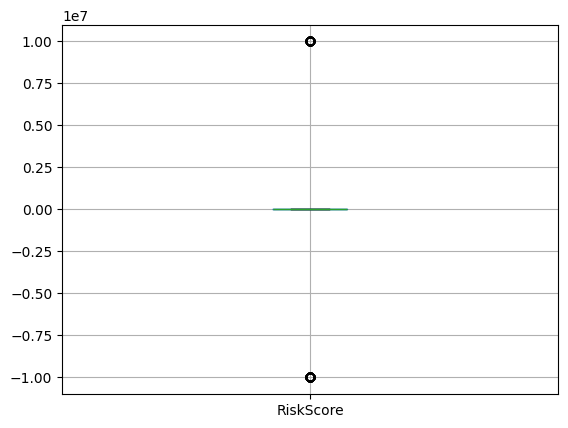

In [130]:
df.boxplot(column='RiskScore')

Видим выбросы у таргета

Фильтрация некорректных значений `RiskScore` из предположения о том, что это вероятность

In [131]:
df = df[(df['RiskScore'] >= 0) & (df['RiskScore'] <= 100)]
df.shape

(9332, 36)

<Axes: >

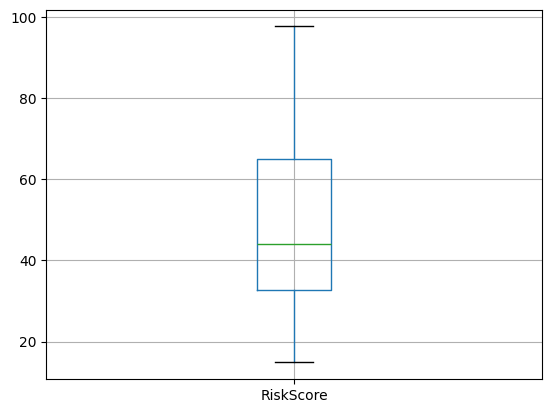

In [132]:
df.boxplot(column='RiskScore')

Преобразование `ApplicationDate` в числовой формат

Кодирование категориальных переменных с использованием целевого кодирования

In [133]:
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])
df['ApplicationDate'] = df['ApplicationDate'].astype(int) / 10**9

target_col = 'RiskScore'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if col in df.columns:
        target_mean = df.groupby(col)[target_col].mean()
        df[col] = df[col].map(target_mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9332 non-null   float64
 1   Age                         9332 non-null   float64
 2   AnnualIncome                9332 non-null   float64
 3   CreditScore                 9332 non-null   float64
 4   LoanAmount                  9332 non-null   float64
 5   LoanDuration                9332 non-null   float64
 6   MaritalStatus               9332 non-null   float64
 7   NumberOfDependents          9332 non-null   float64
 8   HomeOwnershipStatus         9332 non-null   float64
 9   MonthlyDebtPayments         9332 non-null   float64
 10  CreditCardUtilizationRate   9332 non-null   float64
 11  NumberOfOpenCreditLines     9332 non-null   float64
 12  NumberOfCreditInquiries     9332 non-null   float64
 13  DebtToIncomeRatio           9332 non-n

Теперь смотрим итоговую корреляцию с `RiskScore`, а также построим матрицу корреляций.

In [134]:
df.corr()['RiskScore']

,RiskScore
ApplicationDate,0.002558
Age,-0.042744
AnnualIncome,-0.757874
CreditScore,-0.785429
LoanAmount,0.079041
LoanDuration,0.025265
MaritalStatus,0.021763
NumberOfDependents,0.008190
HomeOwnershipStatus,0.014249
MonthlyDebtPayments,0.017922


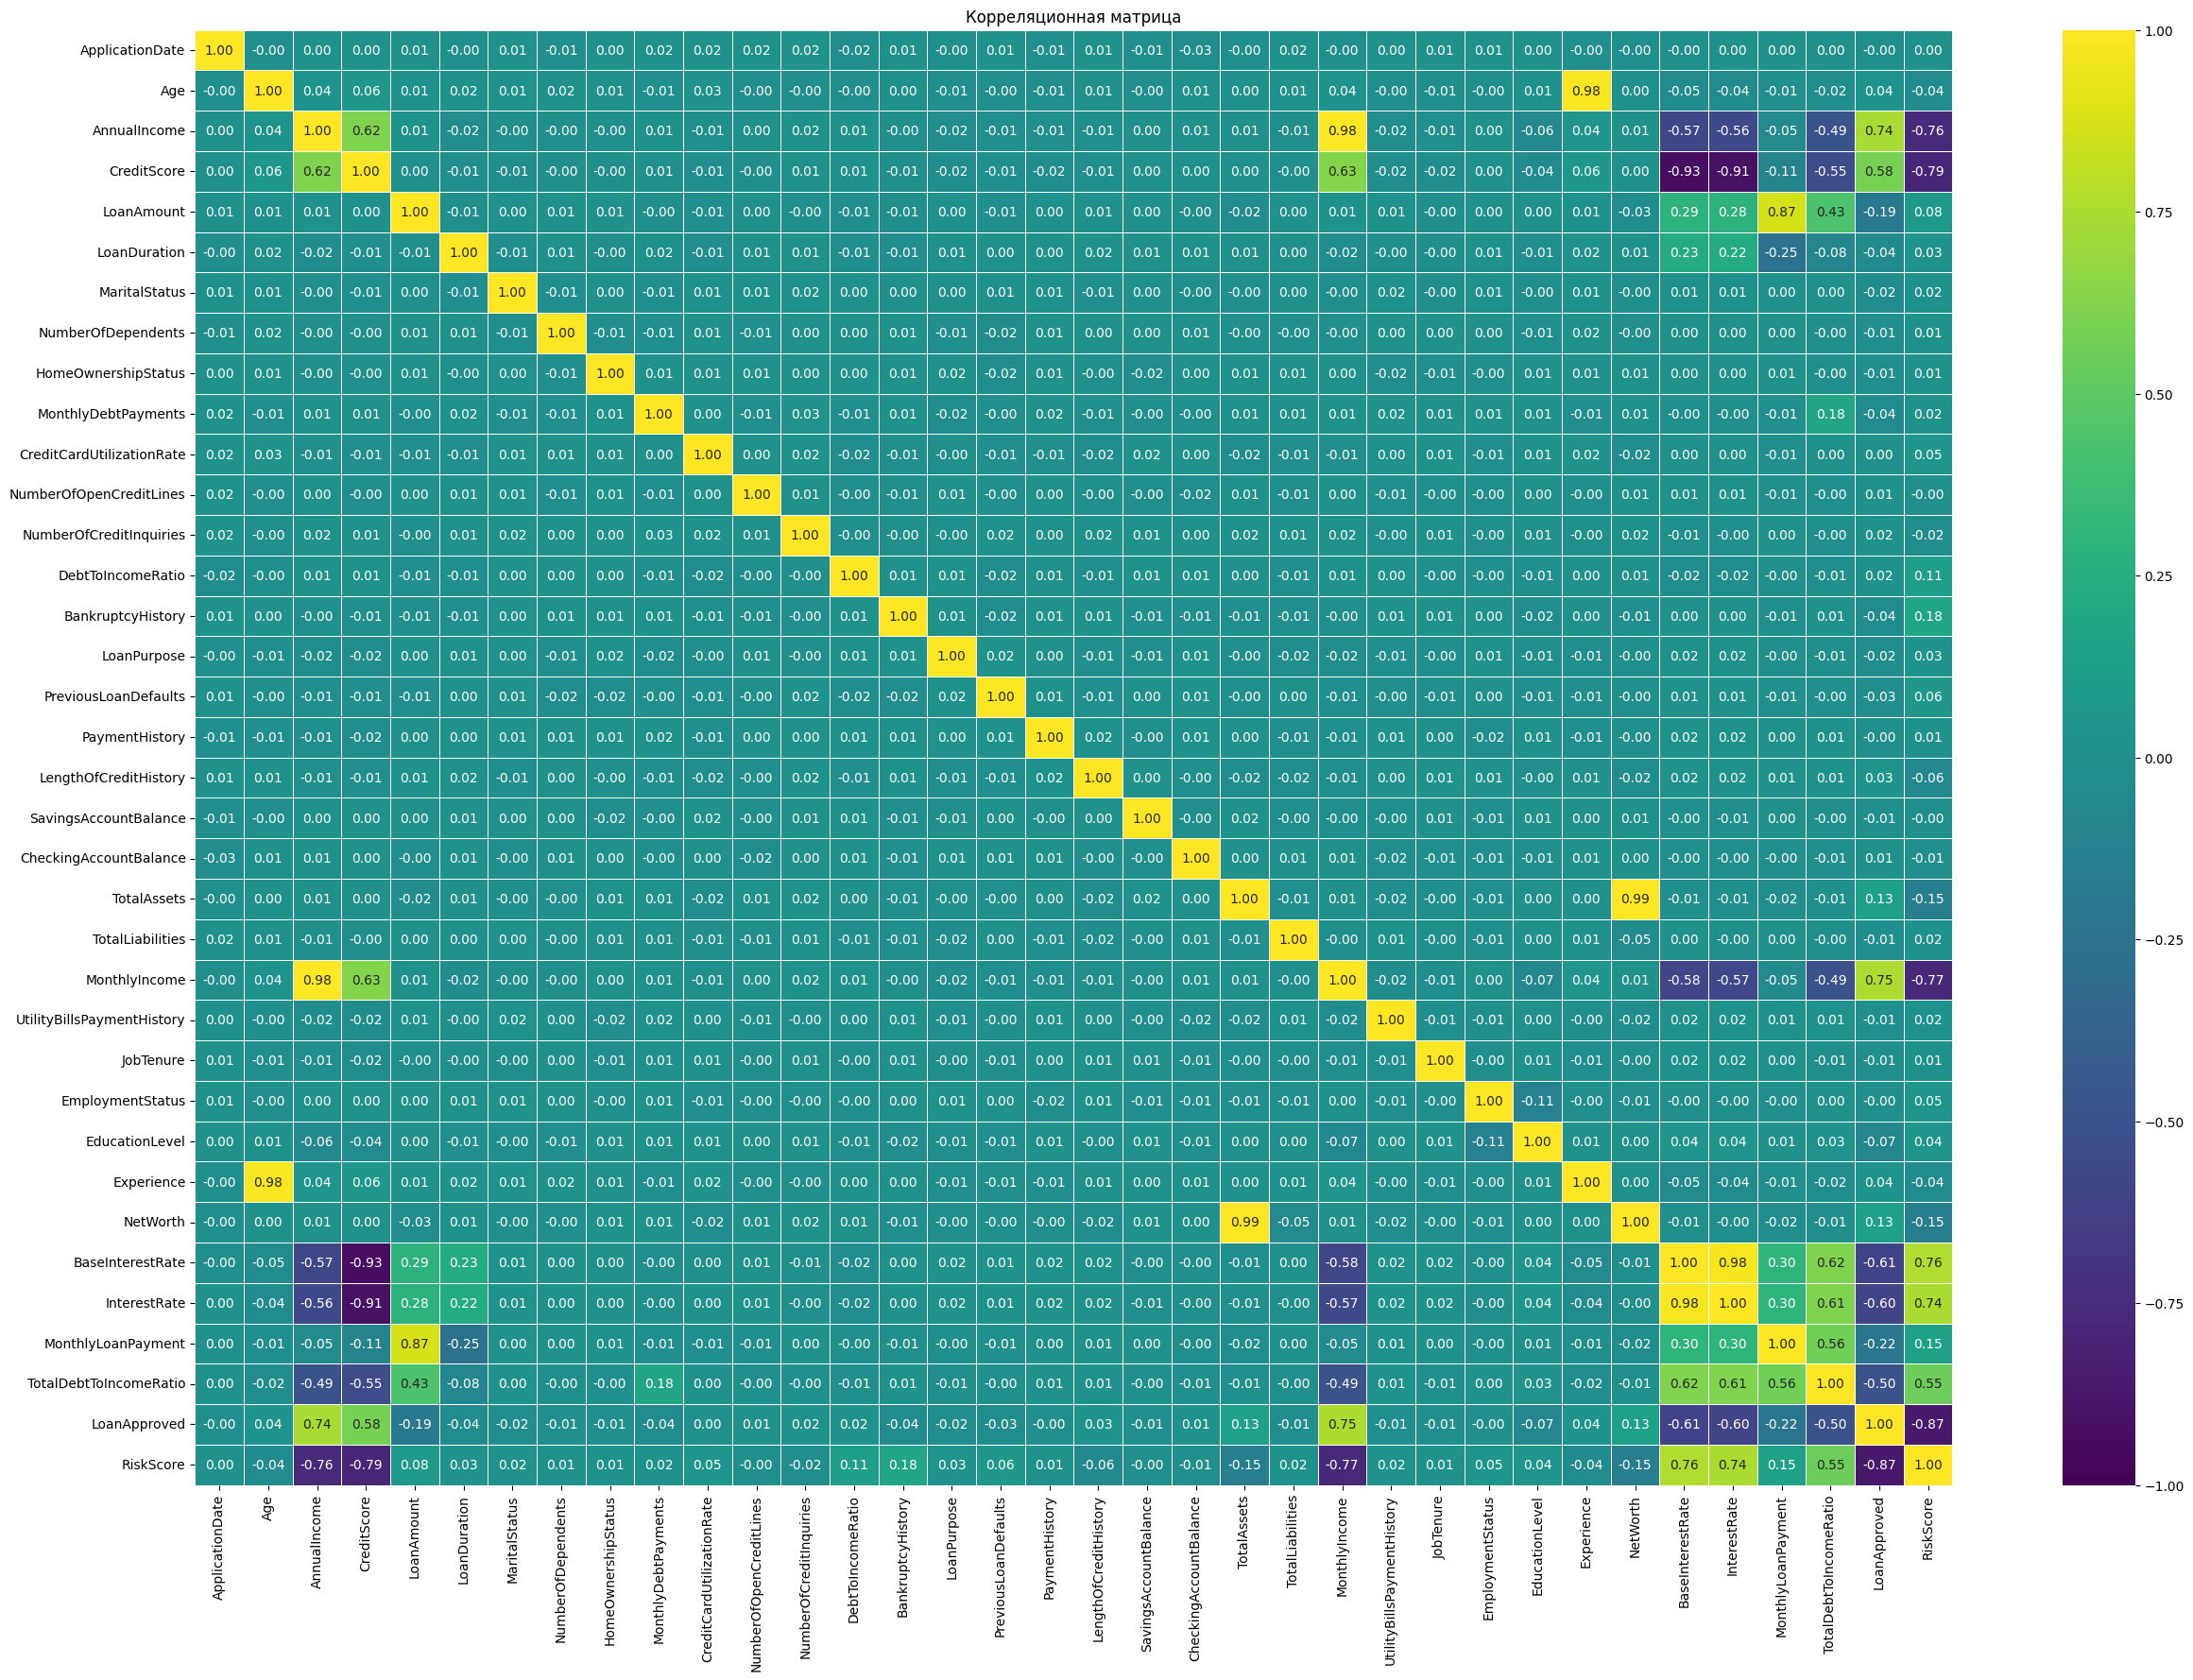

In [135]:
corr_matrix = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

Подготовка данных - done

Просто удаляя признаки с низкой корреляцией можно ухудшить итоговый результат т.к. признаки коррелируют друг с другом

Построю графики зависимости части признаков от целевой переменной `RiskScore`

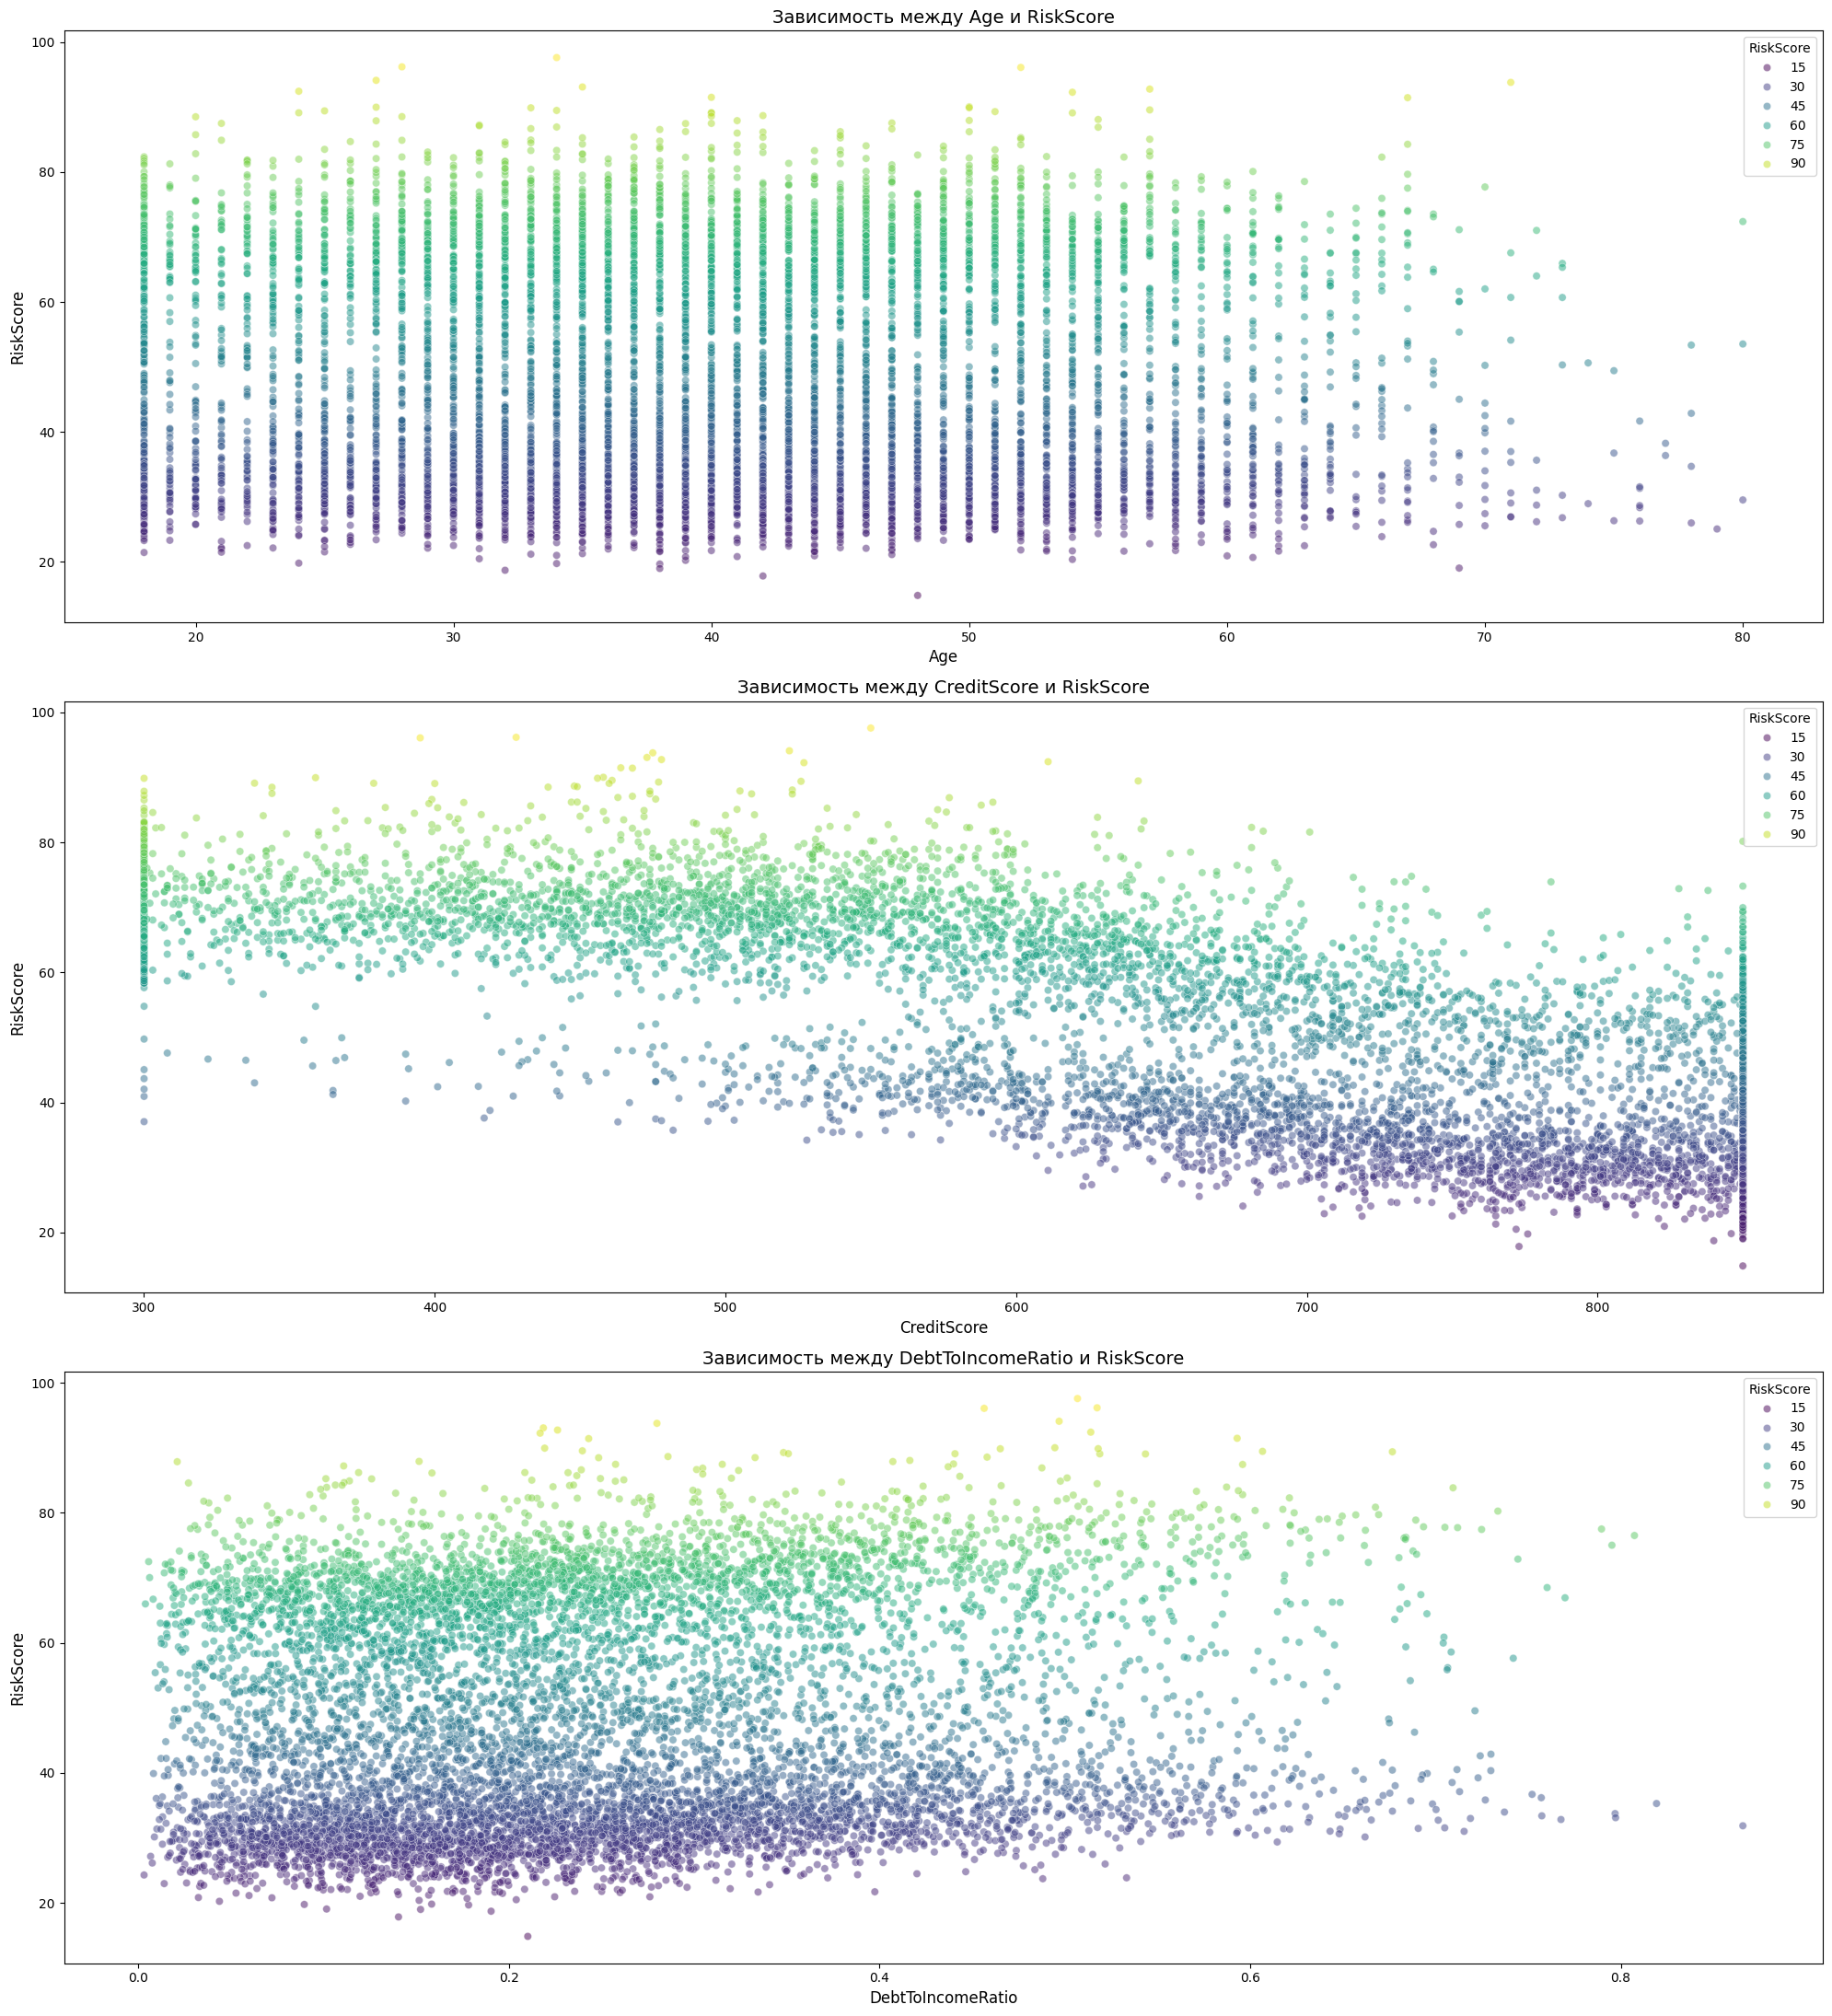

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'CreditScore', 'DebtToIncomeRatio']

plt.figure(figsize=(20, 22))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)
    sns.scatterplot(
        x=df[feature],
        y=df['RiskScore'],
        hue=df['RiskScore'],
        palette='viridis',
        alpha=0.5
    )
    plt.title(f'Зависимость между {feature} и RiskScore', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('RiskScore', fontsize=12)

plt.tight_layout()
plt.show()

На графиках можно заметить следующее:

1.  Возраст (Age): На зависимость RiskScore от возраста явной линейной связи не
наблюдается. Однако отчетливо видна группа с низким возрастом и высоким RiskScore.

2. Кредитный рейтинг (CreditScore): Наблюдается обратная зависимость — с ростом CreditScore значение RiskScore снижается, что может говорить о меньших кредитных рисках при высоком кредитном рейтинге.

3. Отношение долга к доходу (DebtToIncomeRatio): Присутствует тенденция роста RiskScore с увеличением доли долга, что ожидаемо — высокий уровень долга повышает риск.

# Разделение данных, нормализация, обучение модели и оценка модели

Elastic Net сочетает в себе преимущества Lasso (L1) и Ridge (L2) регуляризации, что позволяет эффективно работать с данными, где есть мультиколлинеарность или большое количество признаков.

Можно использовать ElasticNetCV из библиотеки sklearn.

SelectFromModel выбирает признаки на основе их важности, определяемой моделью (в данном случае Elastic Net).

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

X = df.drop('RiskScore', axis=1)

y = df['RiskScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Использование Z-score нормализации (стандартизации)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация модели ElasticNetCV
elastic_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, n_jobs=-1, random_state=42)

# Использование SelectFromModel для отбора признаков
selector = SelectFromModel(elastic_net, threshold='median')  # threshold настраивается
selector.fit(X_train_scaled, y_train)

# Преобразование данных: оставляем только выбранные признаки
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Обучение модели на выбранных признаках
elastic_net.fit(X_train_selected, y_train)

# Предсказание на тестовых данных
y_pred = elastic_net.predict(X_test_selected)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Вывод выбранных признаков
selected_features = X.columns[selector.get_support()]
print("Выбранные признаки:", list(selected_features))

# Вывод коэффициентов модели
print("Коэффициенты модели:")
for feature, coef in zip(selected_features, elastic_net.coef_):
    print(f"{feature}: {coef:.4f}")

# Вывод выбранного значения l1_ratio
print(f"Выбранное значение l1_ratio: {elastic_net.l1_ratio_}")

Mean Squared Error (MSE): 20.7175
R² Score: 0.9311
Выбранные признаки: ['AnnualIncome', 'CreditScore', 'LoanAmount', 'HomeOwnershipStatus', 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'EmploymentStatus', 'EducationLevel', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved']
Коэффициенты модели:
AnnualIncome: -0.3107
CreditScore: -6.6685
LoanAmount: -0.4132
HomeOwnershipStatus: 0.0813
CreditCardUtilizationRate: 0.8999
DebtToIncomeRatio: 2.1723
BankruptcyHistory: 2.5454
PreviousLoanDefaults: 0.6455
LengthOfCreditHistory: -0.8209
SavingsAccountBalance: -0.0944
TotalAssets: -1.4371
TotalLiabilities: 0.2156
MonthlyIncome: -1.3118
EmploymentStatus: 0.9455
EducationLevel: -0.1751
MonthlyLoanPayment: -0.2735
TotalDebtToIncomeRatio: 0.6967
LoanApproved: -9.4424
Выбранное значение l1_ratio: 1.0


# Предсказание и выгрузка

Необходимо обработать `test.csv` аналогично `train.csv`

Далее использовать ранее обученную модель через `ElasticNet`

Предсказания оборачиваются в требуемый формат и сохраняются в файл формата `.csv` - `predictions.csv`.

In [138]:
df_test = pd.read_csv('test.csv')
id = df_test["ID"]
df_test = df_test.drop('ID', axis=1)

df_test['ApplicationDate'] = pd.to_datetime(df_test['ApplicationDate'])
df_test['ApplicationDate'] = df_test['ApplicationDate'].astype(int) / 10**9

target_col = 'LoanAmount'
cat_cols = df_test.select_dtypes(include='object').columns
for col in cat_cols:
    if col in df_test.columns:
        target_mean = df_test.groupby(col)[target_col].mean()
        df_test[col] = df_test[col].map(target_mean)

selected_features_with_target = selected_features.tolist()

df_test = df_test[selected_features_with_target]

scaler = StandardScaler()
scaler.fit(df_test)
df_test = scaler.transform(df_test)

predict = elastic_net.predict(df_test)
result = pd.DataFrame({'ID': id, 'RiskScore': predict})
result.to_csv('predictions.csv', index=False)

Посмотрим еще раз на матрицу корреляций с учетом отобранных признаков.

Для этого добавляем целевую переменную к отобранным признакам и создаем новый DataFrame только с отобранными признаками и целевой переменной.

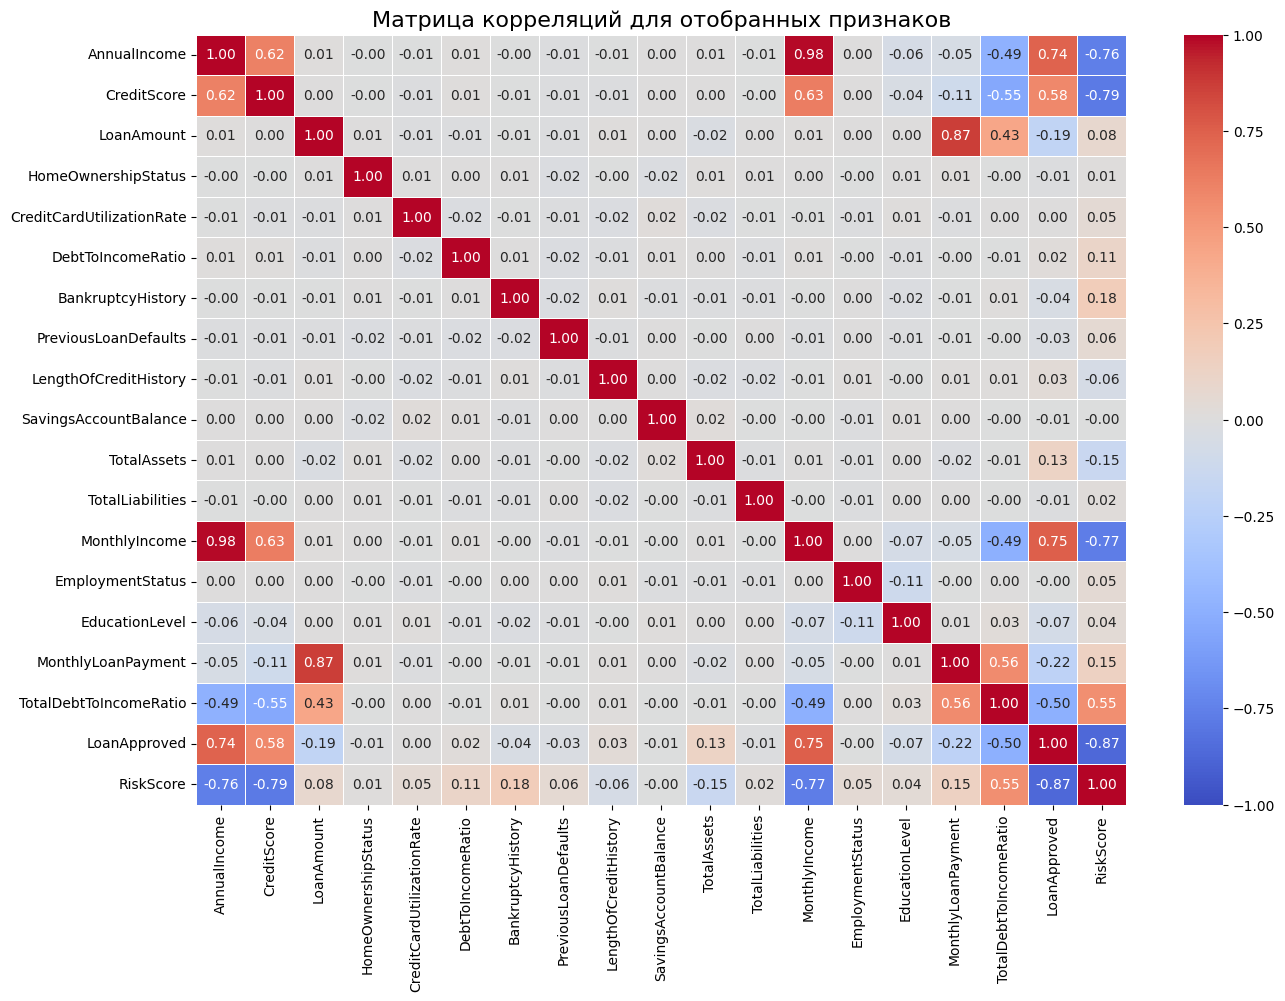

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features_with_target = selected_features.tolist() + ['RiskScore']

df_selected = df[selected_features_with_target]

corr_matrix = df_selected.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.title("Матрица корреляций для отобранных признаков", fontsize=16)
plt.show()